In [1]:
from multi_omics_integration.func import *
from multi_omics_integration.classification_pipeline import *
from multi_omics_integration.processing import *
from multi_omics_integration.evaluation import *
import warnings
from pandas.errors import SettingWithCopyWarning
from sklearn.exceptions import ConvergenceWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=ConvergenceWarning)

In [2]:
datasets = {
            'cnv': '../data/breast/CNV_processedDat.txt',
            'mrna': '../data/breast/mRNA_processedDat.txt',
            'prot': '../data/breast/PROT_processedDat.txt'
}
        
labels = '../data/breast/TCGA_BRCA_subtypes.txt'

In [3]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

estimators = [
    ("logistic", LogisticRegression(solver="lbfgs", n_jobs=-1, multi_class='multinomial', max_iter=1000, random_state=0)),
    ("lasso", LogisticRegression(solver="liblinear", penalty="l1", max_iter=1000, random_state=0)),
    ("elasticnet", SGDClassifier(loss="log_loss", penalty="elasticnet", n_jobs=-1, random_state=0)),
    ("random_forest", RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)),
    ("deep_nn", make_pipeline(StandardScaler(), MLPClassifier(max_iter=500, random_state=0))),
    ("svc", CalibratedClassifierCV(LinearSVC(dual=True, C=10, random_state=0), cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True), n_jobs=-1)),
]

In [4]:
merged_X, X, y = load_resize(datasets, labels, 'PAM50')

## Preprocessing

In [26]:
def get_skewed_columns(df):
    """
    :param df: dataframe where the skewed columns need to determined
    :return: skew_cols: dataframe with the skewed columns
    """
    skew_limit = 1  # define a limit above which we will log transform
    skew_vals = df.skew()
    # Showing the skewed columns
    skew_cols = (skew_vals
                 .sort_values(ascending=False)
                 .to_frame()
                 .rename(columns={0: 'Skew'})
                 .query('abs(Skew) > {}'.format(skew_limit)))
    return skew_cols

In [27]:
get_skewed_columns(X['prot'])

,Skew
LANCL2_prot,3.718915
FRA10AC1_prot,3.287242
SUMF2_prot,3.173488
CHGB_prot,2.994493
ACSM1_prot,2.994391
...,...
EBAG9_prot,-3.250215
BNIP1_prot,-3.320680
NEK1_prot,-3.333115
PIP5K1A_prot,-3.919619


### mRNA

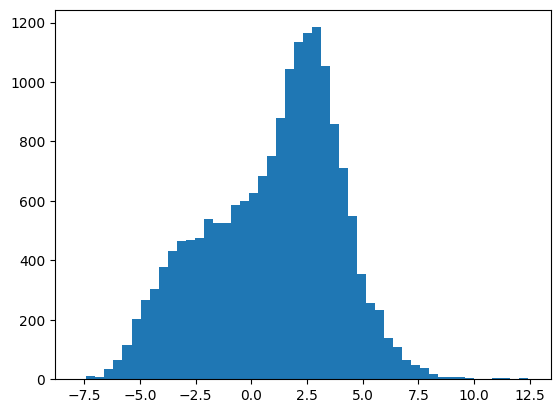

In [10]:
plt.hist(np.mean(X['mrna']), bins=50)
plt.show()

In [46]:
from sklearn.preprocessing import normalize
standard = StandardScaler()
scaled = standard.fit_transform(X['mrna'])

In [ ]:
normalize = normalize(X['mrna'], axis=0)
data_scaled = pd.DataFrame(normalize, columns=X['mrna'].columns)

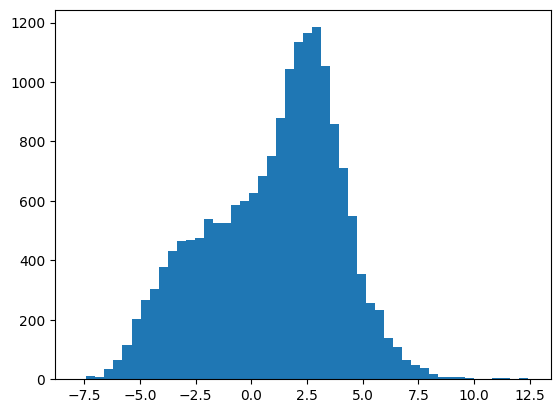

In [44]:
plt.hist(np.mean(X['mrna']), bins=50)
plt.show()

### Prot

In [57]:
from sklearn.preprocessing import Normalizer
scaler = StandardScaler()
normalize = scaler.fit_transform(X['prot'])
data_scaled = pd.DataFrame(normalize, columns=X['prot'].columns)

In [58]:
data_scaled

,A1BG_prot,A2M_prot,A2ML1_prot,AAAS_prot,AACS_prot,AAGAB_prot,AAK1_prot,AAMDC_prot,AAMP_prot,AAR2_prot,...,ZRSR2_prot,ZSCAN18_prot,ZSWIM8_prot,ZW10_prot,ZWILCH_prot,ZWINT_prot,ZYG11B_prot,ZYX_prot,ZZEF1_prot,ZZZ3_prot
0,-0.956485,-0.397222,1.857197,-0.429462,-1.508858,-0.828228,-0.840309,0.378944,-0.804719,-0.099497,...,0.228694,-0.139183,0.270112,0.013868,0.100375,-0.120801,-0.858608,0.090639,-0.285804,-0.218359
1,0.665383,0.852401,-1.899045,2.679871,-0.111891,-0.366473,-0.756184,-1.760515,-1.366699,2.865395,...,-1.532916,-1.769399,1.858999,0.822321,0.952063,-1.034434,2.245140,-1.442913,0.154830,2.644577
2,1.667063,1.615182,0.238230,1.850420,-1.125776,1.527736,2.642638,-1.820165,-0.630282,0.195015,...,1.223733,0.540032,0.120865,1.693876,3.024765,2.607282,2.888155,-2.188022,-1.175469,-1.495259
3,-0.504858,-0.330119,-0.046327,0.251593,-0.898547,-0.710808,-0.751625,-0.101347,-0.292410,-0.141792,...,0.539006,0.139091,0.439650,0.869904,1.010408,1.096530,0.010266,1.176367,-0.511520,0.379874
4,-0.607927,-0.286130,-0.326793,-0.152620,0.648835,-0.106283,-0.531853,1.626288,-0.566506,-0.473666,...,-0.086265,-0.462997,0.269182,-0.475448,-0.198871,0.202065,-0.706124,-0.303169,0.457469,0.059646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,1.363396,1.175113,2.508876,2.347449,0.712634,-0.675912,1.428126,-2.086839,-2.267467,1.649196,...,-4.856804,-0.957751,-2.553074,0.981134,1.937417,-0.284238,2.211484,-1.220857,-1.624340,0.903917
99,0.136158,0.004591,-1.588187,0.057478,-0.641052,0.005476,0.154986,0.616327,0.323433,-0.157827,...,0.626745,-0.447138,0.390254,-0.246632,-0.097350,-0.533602,-0.295617,-0.246731,1.539182,0.117355
100,-2.104845,-1.866432,2.765003,0.010475,-0.739295,-1.391143,0.263542,1.039824,-0.826123,-1.567381,...,0.201965,0.178477,0.638473,-0.660906,-0.223820,-1.025770,-1.373172,-0.049661,-1.860173,-0.149556
101,0.651186,0.575454,3.549817,1.502756,-1.940724,-0.954508,-0.334183,-1.601486,-2.653125,2.824596,...,2.174193,-0.566389,1.664854,-0.869796,1.304328,1.179343,2.719321,-0.486156,-1.889857,-1.061120


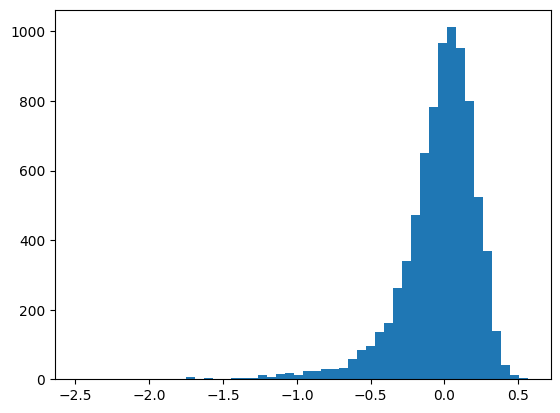

In [29]:
plt.hist(np.mean(X['prot']), bins=50)
plt.show()

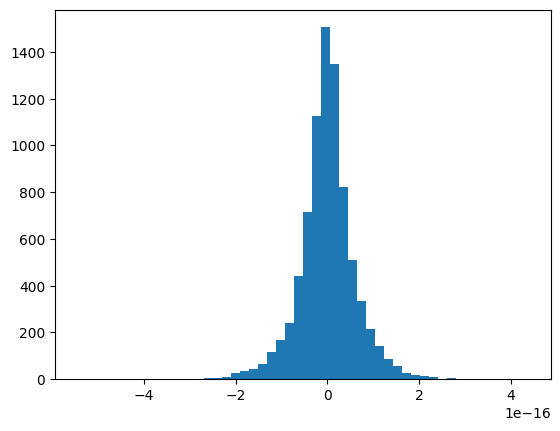

In [59]:
plt.hist(np.mean(data_scaled), bins=50)
plt.show()

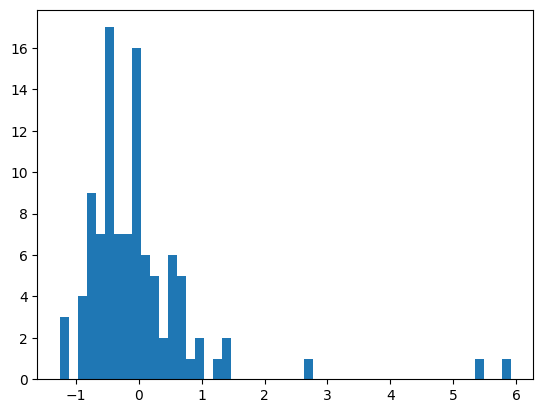

In [65]:
plt.hist(data_scaled['LANCL2_prot'], bins=50)
plt.show()

In [64]:
get_skewed_columns(data_scaled)

,Skew
LANCL2_prot,3.718915
FRA10AC1_prot,3.287242
SUMF2_prot,3.173488
CHGB_prot,2.994493
ACSM1_prot,2.994391
...,...
EBAG9_prot,-3.250215
BNIP1_prot,-3.320680
NEK1_prot,-3.333115
PIP5K1A_prot,-3.919619


In [30]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(random_state=0, output_distribution='normal')
transformed = qt.fit_transform(X['prot'])

/Users/signehoel/comp401/sklearn-venv/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2623: UserWarning: n_quantiles (1000) is greater than the total number of samples (103). n_quantiles is set to n_samples.
  warnings.warn(


In [34]:
pd.DataFrame(transformed)

,0,1,2,3,4,5,6,7,8,9,...,8082,8083,8084,8085,8086,8087,8088,8089,8090,8091
0,-0.928899,-0.377392,1.654435,-0.172881,-1.759861,-0.820792,-0.855712,0.325110,-0.820792,0.223008,...,0.299307,-0.147987,0.197882,0.147987,0.248275,0.049169,-1.138523,-0.024577,-0.248275,-0.299307
1,0.786845,0.721522,-5.199338,2.333769,0.000000,-0.325110,-0.753782,-1.486092,-1.486092,2.061917,...,-1.654435,-1.654435,5.199338,0.689997,0.820792,-1.351702,1.654435,-1.486092,0.147987,2.061917
2,1.292805,1.759861,0.599230,1.654435,-1.292805,1.654435,2.333769,-1.654435,-0.753782,0.541395,...,1.486092,0.570074,0.000000,1.759861,5.199338,2.333769,5.199338,-2.061917,-1.238080,-1.564726
3,-0.457852,-0.248275,0.248275,0.513155,-0.891709,-0.689997,-0.721522,-0.403916,-0.273702,0.197882,...,0.855712,0.123185,0.403916,0.786845,0.855712,1.186831,0.325110,1.292805,-0.485318,0.721522
4,-0.599230,-0.223008,-0.147987,0.172881,0.753782,-0.098458,-0.485318,2.061917,-0.628904,-0.273702,...,-0.513155,-0.599230,0.172881,-0.485318,-0.073791,0.351131,-0.721522,-0.377392,0.513155,0.197882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,1.238080,1.238080,1.759861,1.889510,0.855712,-0.628904,1.415702,-2.333769,-2.333769,1.351702,...,-5.199338,-0.967422,-2.333769,1.049131,1.889510,-0.197882,1.564726,-1.238080,-1.654435,1.138523
99,0.172881,0.024577,-2.333769,0.403916,-0.513155,0.123185,0.073791,0.599230,0.325110,0.123185,...,1.138523,-0.541395,0.377392,-0.197882,0.000000,-0.628904,0.024577,-0.299307,1.486092,0.325110
100,-2.333769,-2.333769,2.061917,0.377392,-0.689997,-2.333769,0.172881,1.138523,-0.855712,-2.333769,...,0.273702,0.172881,0.541395,-0.689997,-0.123185,-1.292805,-2.333769,-0.123185,-1.889510,-0.147987
101,0.721522,0.430727,5.199338,1.186831,-5.199338,-0.928899,-0.351131,-1.415702,-5.199338,1.889510,...,2.061917,-0.689997,1.759861,-0.891709,1.238080,1.292805,2.333769,-0.570074,-2.061917,-1.415702


In [68]:
estimators = [
    ("logistic", LogisticRegression(solver="lbfgs", n_jobs=-1, multi_class='multinomial', max_iter=1000, random_state=0)),
    ("lasso", LogisticRegression(solver="liblinear", penalty="l1", max_iter=1000, random_state=0)),
    ("elasticnet", SGDClassifier(loss="log_loss", penalty="elasticnet", n_jobs=-1, random_state=0)),
    ("random_forest", RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)),
    ("deep_nn", make_pipeline(StandardScaler(), MLPClassifier(max_iter=500, random_state=0))),
    ("svc", CalibratedClassifierCV(LinearSVC(dual=True, random_state=0), cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True), n_jobs=-1)),
]

In [69]:
metrics_df = pd.DataFrame()
metrics_df_train = pd.DataFrame()
scores = []
   
for name, clf in tqdm(estimators):
      score, df, train_df = get_cross_metrics(clf, data_scaled, y, name, return_train_score=True)
   
      metrics_df = pd.concat([metrics_df, df])
      metrics_df_train = pd.concat([metrics_df_train, train_df])
      scores.append(score)

100%|██████████| 6/6 [00:20<00:00,  3.40s/it]


In [70]:
metrics_df

,f1,accuracy
logistic,0.648 +/- 0.119,0.658 +/- 0.115
lasso,0.658 +/- 0.126,0.667 +/- 0.121
elasticnet,0.589 +/- 0.059,0.601 +/- 0.059
random_forest,0.606 +/- 0.083,0.620 +/- 0.081
deep_nn,0.530 +/- 0.127,0.561 +/- 0.110
svc,0.581 +/- 0.121,0.629 +/- 0.125


## Individual Models

In [115]:
base_scores = {}
base_metrics_df = {}
base_metrics_df_train = {}

for modality in datasets:
   base_metrics_df[modality] = pd.DataFrame()
   base_metrics_df_train[modality] = pd.DataFrame()
   base_scores[modality] = []
   
   for name, clf in tqdm(estimators):
      score, df, train_df = get_cross_metrics(clf, X[modality], y, name, return_train_score=True)
   
      base_metrics_df[modality] = pd.concat([base_metrics_df[modality], df])
      base_metrics_df_train[modality] = pd.concat([base_metrics_df_train[modality], train_df])
      base_scores[modality].append(score)

  0%|          | 0/6 [00:00<?, ?it/s]

100%|██████████| 6/6 [00:16<00:00,  2.76s/it]


In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(actual_classes, predicted_classes, sorted_labels, show=False):

    cm = confusion_matrix(actual_classes, predicted_classes)
    # Normalise
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=sorted_labels, yticklabels=sorted_labels)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    if show:
        plt.show(block=False)
    return plt
    

In [ ]:
def get_cross_metrics(
    estimator,
    X,
    y,
    name="Model",
    cv=5,
    scoring={"f1": make_scorer(f1_score, average="weighted"), "accuracy": "accuracy"},
    n_jobs=-1,
    verbose=0,
    fit_params=None,
    return_train_score=False,
):
    metrics = {}
    train_metrics = {}

    for scorer in scoring:
        metrics[scorer] = []
        train_metrics[scorer] = []

    skf = StratifiedKFold(n_splits=cv, random_state=0, shuffle=True)
    '''scores = cross_validate(
        estimator,
        X,
        y,
        scoring=scoring,
        cv=skf,
        n_jobs=n_jobs,
        verbose=verbose,
        fit_params=fit_params,
        return_train_score=return_train_score,
        error_score="raise",
    )'''
    
    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
            
    for scorer in scoring:
        metrics[scorer].append(
            "%0.3f +/- %0.3f"
            % (scores["test_%s" % scorer].mean(), scores["test_%s" % scorer].std())
        )
        if return_train_score:
            train_metrics[scorer].append(
                "%0.3f +/- %0.3f"
                % (
                    scores["train_%s" % scorer].mean(),
                    scores["train_%s" % scorer].std(),
                )
            )

    if return_train_score:
        df = pd.DataFrame(metrics, index=[name])
        train_df = pd.DataFrame(train_metrics, index=[f"{name} - train"])

        return scores, df, train_df

    df = pd.DataFrame(metrics, index=[name])
    return scores, df

In [14]:
def recall_multiclass(y_test, y_pred, label):
    return recall_score(y_test, y_pred, average=None)[label]

In [15]:
base_scores = {}
base_metrics_df = {}
base_metrics_df_train = {}

for modality in datasets:
   base_metrics_df[modality] = pd.DataFrame()
   base_metrics_df_train[modality] = pd.DataFrame()
   base_scores[modality] = []
   
   for name, clf in tqdm(estimators):
      score, df, train_df = get_cross_metrics(clf, X[modality], y, name, scoring={"accuracy": "accuracy", "f1": make_scorer(f1_score, average='weighted'), 'recall (0)': make_scorer(recall_multiclass, label=0), 'recall (1)': make_scorer(recall_multiclass, label=1), 'recall (2)': make_scorer(recall_multiclass, label=2), 'recall (3)': make_scorer(recall_multiclass, label=3)}, return_train_score=True)
   
      base_metrics_df[modality] = pd.concat([base_metrics_df[modality], df])
      base_metrics_df_train[modality] = pd.concat([base_metrics_df_train[modality], train_df])
      base_scores[modality].append(score)

100%|██████████| 6/6 [00:19<00:00,  3.24s/it]


### Plots

In [16]:
display(base_metrics_df['cnv']), display(base_metrics_df['mrna']), display(base_metrics_df['prot'])

,accuracy,f1,recall (0),recall (1),recall (2),recall (3)
logistic,0.650 +/- 0.069,0.635 +/- 0.078,0.960 +/- 0.080,0.417 +/- 0.247,0.767 +/- 0.200,0.448 +/- 0.146
lasso,0.699 +/- 0.116,0.695 +/- 0.125,0.840 +/- 0.233,0.750 +/- 0.247,0.687 +/- 0.131,0.567 +/- 0.158
elasticnet,0.601 +/- 0.054,0.598 +/- 0.051,0.960 +/- 0.080,0.433 +/- 0.082,0.547 +/- 0.148,0.471 +/- 0.111
random_forest,0.620 +/- 0.061,0.587 +/- 0.078,0.920 +/- 0.098,0.217 +/- 0.194,0.793 +/- 0.124,0.462 +/- 0.184
deep_nn,0.601 +/- 0.059,0.573 +/- 0.060,0.960 +/- 0.080,0.300 +/- 0.367,0.733 +/- 0.226,0.414 +/- 0.149
svc,0.592 +/- 0.051,0.575 +/- 0.055,0.840 +/- 0.080,0.217 +/- 0.113,0.667 +/- 0.211,0.581 +/- 0.285


,accuracy,f1,recall (0),recall (1),recall (2),recall (3)
logistic,0.804 +/- 0.119,0.801 +/- 0.116,0.920 +/- 0.098,0.633 +/- 0.261,0.867 +/- 0.163,0.743 +/- 0.224
lasso,0.786 +/- 0.091,0.780 +/- 0.089,0.920 +/- 0.098,0.750 +/- 0.247,0.760 +/- 0.131,0.710 +/- 0.220
elasticnet,0.727 +/- 0.088,0.715 +/- 0.078,0.880 +/- 0.160,0.483 +/- 0.220,0.700 +/- 0.306,0.781 +/- 0.210
random_forest,0.825 +/- 0.069,0.820 +/- 0.065,0.960 +/- 0.080,0.650 +/- 0.226,0.827 +/- 0.150,0.810 +/- 0.156
deep_nn,0.803 +/- 0.132,0.775 +/- 0.167,1.000 +/- 0.000,0.583 +/- 0.258,0.867 +/- 0.163,0.705 +/- 0.373
svc,0.805 +/- 0.090,0.800 +/- 0.089,0.920 +/- 0.098,0.633 +/- 0.261,0.827 +/- 0.150,0.776 +/- 0.196


,accuracy,f1,recall (0),recall (1),recall (2),recall (3)
logistic,0.638 +/- 0.122,0.627 +/- 0.127,0.880 +/- 0.098,0.367 +/- 0.194,0.587 +/- 0.224,0.648 +/- 0.202
lasso,0.630 +/- 0.056,0.625 +/- 0.054,0.830 +/- 0.087,0.433 +/- 0.178,0.553 +/- 0.164,0.652 +/- 0.079
elasticnet,0.639 +/- 0.096,0.617 +/- 0.103,0.870 +/- 0.108,0.367 +/- 0.251,0.587 +/- 0.247,0.652 +/- 0.132
random_forest,0.620 +/- 0.081,0.606 +/- 0.083,0.800 +/- 0.126,0.317 +/- 0.186,0.693 +/- 0.242,0.590 +/- 0.137
deep_nn,0.561 +/- 0.110,0.530 +/- 0.127,0.830 +/- 0.087,0.267 +/- 0.226,0.347 +/- 0.185,0.710 +/- 0.171
svc,0.657 +/- 0.132,0.647 +/- 0.138,0.880 +/- 0.098,0.317 +/- 0.186,0.653 +/- 0.185,0.676 +/- 0.219


(None, None, None)

In [116]:
display(base_metrics_df['cnv']), display(base_metrics_df['mrna']), display(base_metrics_df['prot'])

,f1,accuracy
logistic,0.635 +/- 0.078,0.650 +/- 0.069
lasso,0.695 +/- 0.125,0.699 +/- 0.116
elasticnet,0.598 +/- 0.051,0.601 +/- 0.054
random_forest,0.587 +/- 0.078,0.620 +/- 0.061
deep_nn,0.573 +/- 0.060,0.601 +/- 0.059
svc,0.575 +/- 0.055,0.592 +/- 0.051


,f1,accuracy
logistic,0.801 +/- 0.116,0.804 +/- 0.119
lasso,0.780 +/- 0.089,0.786 +/- 0.091
elasticnet,0.715 +/- 0.078,0.727 +/- 0.088
random_forest,0.820 +/- 0.065,0.825 +/- 0.069
deep_nn,0.775 +/- 0.167,0.803 +/- 0.132
svc,0.800 +/- 0.089,0.805 +/- 0.090


,f1,accuracy
logistic,0.627 +/- 0.127,0.638 +/- 0.122
lasso,0.625 +/- 0.054,0.630 +/- 0.056
elasticnet,0.617 +/- 0.103,0.639 +/- 0.096
random_forest,0.606 +/- 0.083,0.620 +/- 0.081
deep_nn,0.530 +/- 0.127,0.561 +/- 0.110
svc,0.647 +/- 0.138,0.657 +/- 0.132


(None, None, None)

In [117]:
estimator_names = [
    "logistic",
    "lasso",
    "elasticnet",
    "random_forest",
    "deep_nn",
    "svc"
]

In [27]:
def plot_scores(estimator_names, scorers, metrics=["f1", "accuracy"]):
    score_lists = {}
    for metric in metrics:
        score_lists[metric] = [score["test_" + metric] for score in scorers]

    for i, (title, _list) in enumerate(score_lists.items()):
        plt.figure(i)
        sns.boxplot(data=_list, showmeans=True, meanprops={'marker':'o', 'markerfacecolor':'white', 
                       'markeredgecolor':'black',
                       'markersize':'8'}).set_xticklabels(estimator_names, rotation=45)
        plt.title(title)

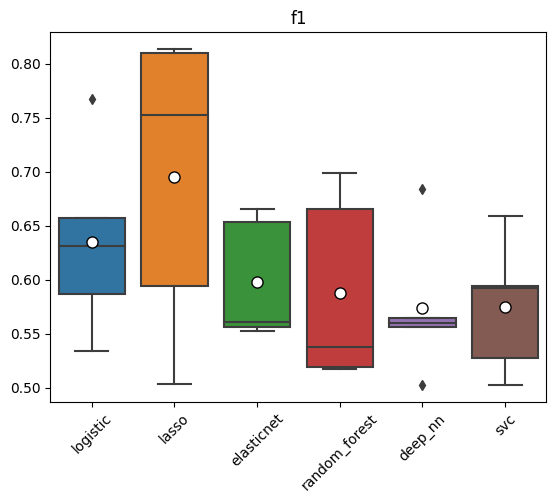

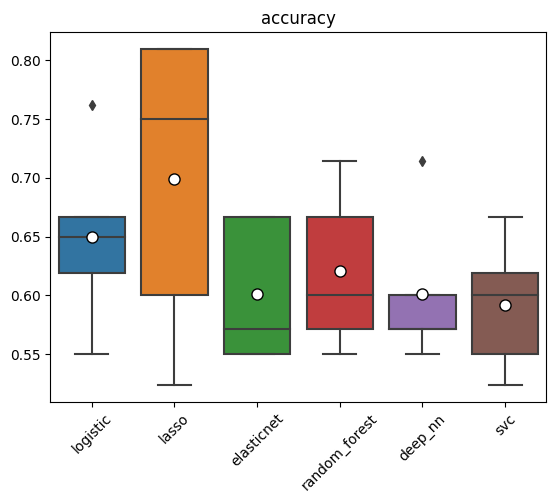

In [170]:
plot_scores(estimator_names, base_scores['cnv'])

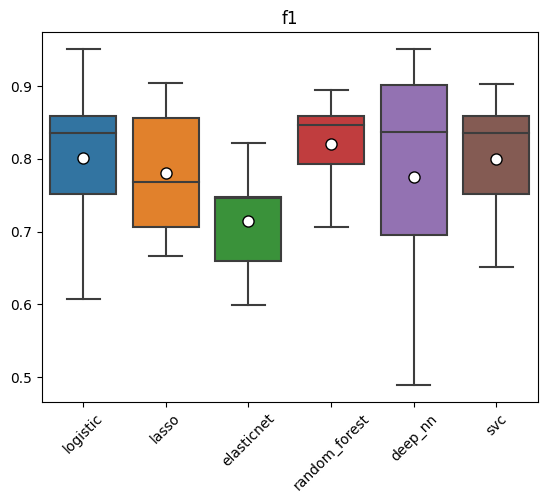

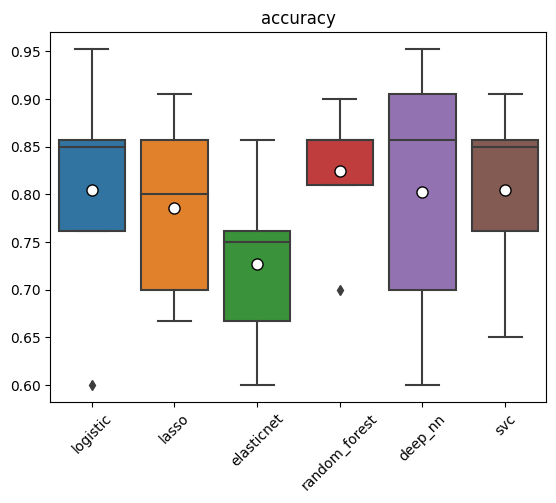

In [171]:
plot_scores(estimator_names, base_scores['mrna'])

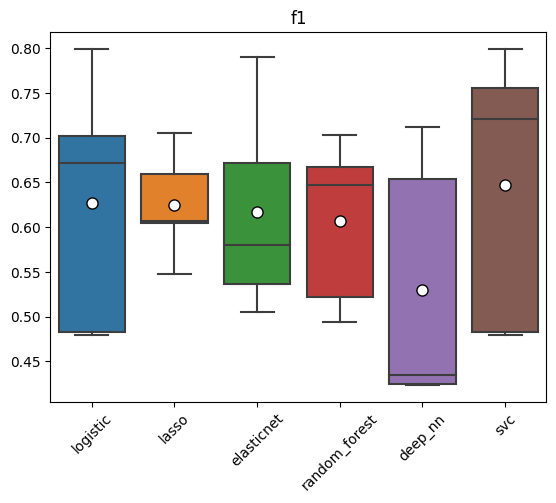

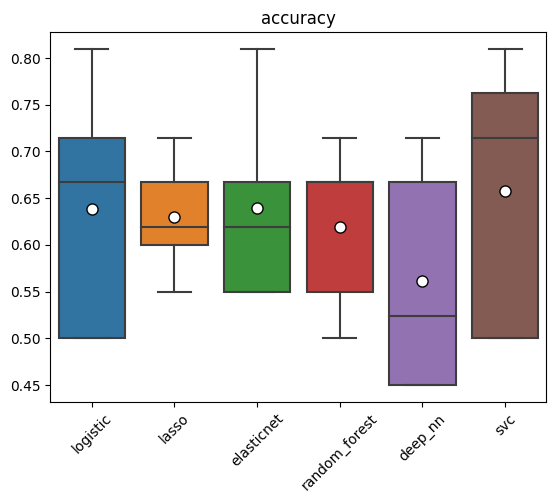

In [172]:
plot_scores(estimator_names, base_scores['prot'])

### Analysis

In [37]:
# Let's look at the classification report from the top estimator for each modality
cv = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
y_preds = {}

mapping = {
    'cnv': "lasso",
    'mrna': "svc",
    'prot': "logistic"
}

for modality in tqdm(datasets):
    y_preds[modality] = cross_val_predict(base_pipes[modality][mapping[modality]], X[modality], y[modality], method='predict', cv=cv)
    print(modality)
    print(classification_report(y[modality], y_preds[modality]))

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:05<00:11,  5.61s/it]

cnv
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        24
           1       0.71      0.67      0.69        18
           2       0.67      0.69      0.68        29
           3       0.48      0.44      0.46        32

    accuracy                           0.67       103
   macro avg       0.68      0.69      0.68       103
weighted avg       0.66      0.67      0.66       103



 67%|██████▋   | 2/3 [01:11<00:41, 41.15s/it]

mrna
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        24
           1       0.86      0.67      0.75        18
           2       0.83      0.86      0.85        29
           3       0.77      0.84      0.81        32

    accuracy                           0.84       103
   macro avg       0.86      0.83      0.84       103
weighted avg       0.85      0.84      0.84       103



100%|██████████| 3/3 [01:25<00:00, 28.57s/it]

prot
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        24
           1       0.50      0.44      0.47        18
           2       0.64      0.62      0.63        29
           3       0.56      0.59      0.58        32

    accuracy                           0.65       103
   macro avg       0.65      0.64      0.64       103
weighted avg       0.65      0.65      0.65       103



In [ ]:
# Let's look at the classification report from the top estimator for each modality
cv = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
y_preds = {}

for name, estimator in base_pipes['mrna'].items():
    print(name)
    y_preds[name] = cross_val_predict(estimator, X['mrna'], y['mrna'], method='predict', cv=cv)
    print(classification_report(y['mrna'], y_preds[name]))

In [23]:
for name, pred in y_preds.items():
    print(name)
    print(classification_report(y['mrna'], y_preds[name]))

logistic
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        24
           1       0.75      0.67      0.71        18
           2       0.83      0.83      0.83        29
           3       0.74      0.78      0.76        32

    accuracy                           0.82       103
   macro avg       0.82      0.81      0.81       103
weighted avg       0.82      0.82      0.82       103

lasso
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        24
           1       0.84      0.89      0.86        18
           2       0.69      0.62      0.65        29
           3       0.64      0.72      0.68        32

    accuracy                           0.77       103
   macro avg       0.79      0.79      0.79       103
weighted avg       0.77      0.77      0.77       103

elasticnet
              precision    recall  f1-score   support

           0       1.00      0.88      0.93      

Looks like class 0 has very high recall for all modalities/classifiers. However, we see that CNV is really bad at classifying class 3, and prot is poorest at identifying class 1. Seems like they are better at different things, and could benefit from combination!

### Trying to Reduce Overfitting

In [32]:
display(base_metrics_df_train['cnv'], base_metrics_df['cnv'])

,f1,accuracy
logistic - train,1.000 +/- 0.000,1.000 +/- 0.000
lasso - train,0.969 +/- 0.006,0.968 +/- 0.006
elasticnet - train,0.993 +/- 0.006,0.993 +/- 0.006
random_forest - train,1.000 +/- 0.000,1.000 +/- 0.000
deep_nn - train,1.000 +/- 0.000,1.000 +/- 0.000
svc - train,0.954 +/- 0.032,0.954 +/- 0.032


,f1,accuracy
logistic,0.635 +/- 0.078,0.650 +/- 0.069
lasso,0.695 +/- 0.125,0.699 +/- 0.116
elasticnet,0.640 +/- 0.066,0.650 +/- 0.058
random_forest,0.587 +/- 0.078,0.620 +/- 0.061
deep_nn,0.501 +/- 0.096,0.522 +/- 0.102
svc,0.575 +/- 0.055,0.592 +/- 0.051


In [33]:
display(base_metrics_df_train['mrna'], base_metrics_df['mrna'])

,f1,accuracy
logistic - train,1.000 +/- 0.000,1.000 +/- 0.000
lasso - train,1.000 +/- 0.000,1.000 +/- 0.000
elasticnet - train,1.000 +/- 0.000,1.000 +/- 0.000
random_forest - train,1.000 +/- 0.000,1.000 +/- 0.000
deep_nn - train,0.599 +/- 0.102,0.662 +/- 0.106
svc - train,1.000 +/- 0.000,1.000 +/- 0.000


,f1,accuracy
logistic,0.801 +/- 0.116,0.804 +/- 0.119
lasso,0.780 +/- 0.089,0.786 +/- 0.091
elasticnet,0.789 +/- 0.041,0.795 +/- 0.052
random_forest,0.820 +/- 0.065,0.825 +/- 0.069
deep_nn,0.515 +/- 0.111,0.601 +/- 0.082
svc,0.800 +/- 0.089,0.805 +/- 0.090


In [34]:
display(base_metrics_df_train['prot'], base_metrics_df['prot'])

,f1,accuracy
logistic - train,1.000 +/- 0.000,1.000 +/- 0.000
lasso - train,1.000 +/- 0.000,1.000 +/- 0.000
elasticnet - train,1.000 +/- 0.000,1.000 +/- 0.000
random_forest - train,1.000 +/- 0.000,1.000 +/- 0.000
deep_nn - train,1.000 +/- 0.000,1.000 +/- 0.000
svc - train,1.000 +/- 0.000,1.000 +/- 0.000


,f1,accuracy
logistic,0.627 +/- 0.127,0.638 +/- 0.122
lasso,0.625 +/- 0.054,0.630 +/- 0.056
elasticnet,0.597 +/- 0.092,0.611 +/- 0.094
random_forest,0.606 +/- 0.083,0.620 +/- 0.081
deep_nn,0.599 +/- 0.118,0.620 +/- 0.109
svc,0.647 +/- 0.138,0.657 +/- 0.132


We can see that all these algorithms are highly overfitting the data.

In [49]:
lr_models = {
    "C=0.01": LogisticRegression(solver="lbfgs", n_jobs=-1, multi_class='multinomial', C=0.01, max_iter=1000, random_state=0),
    "C=0.1": LogisticRegression(solver="lbfgs", n_jobs=-1, multi_class='multinomial', C=0.1, max_iter=1000, random_state=0),
    "C=0.5": LogisticRegression(solver="lbfgs", n_jobs=-1, multi_class='multinomial', C=0.5, max_iter=1000, random_state=0),
    "C=1": LogisticRegression(solver="lbfgs", n_jobs=-1, multi_class='multinomial', C=1, max_iter=1000, random_state=0),
}

In [50]:
metrics = pd.DataFrame()
metrics_train=pd.DataFrame()
scores=[]

for name, clf in lr_models.items():
    score, df, train_df = get_cross_metrics(clf, X['prot'], y, name, return_train_score=True)
    metrics = pd.concat([metrics, df])
    metrics_train = pd.concat([metrics_train, train_df])
    scores.append(score)

In [51]:
display(metrics_train, metrics)

,f1,accuracy
C=0.01 - train,1.000 +/- 0.000,1.000 +/- 0.000
C=0.1 - train,1.000 +/- 0.000,1.000 +/- 0.000
C=0.5 - train,1.000 +/- 0.000,1.000 +/- 0.000
C=1 - train,1.000 +/- 0.000,1.000 +/- 0.000


,f1,accuracy
C=0.01,0.619 +/- 0.115,0.629 +/- 0.109
C=0.1,0.627 +/- 0.127,0.638 +/- 0.122
C=0.5,0.627 +/- 0.127,0.638 +/- 0.122
C=1,0.627 +/- 0.127,0.638 +/- 0.122


Changing C doesn't seem to have a big difference on the performance, prot is still overfitting.

In [55]:
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.preprocessing import MinMaxScaler

pipeline = Pipeline([('scaler', MinMaxScaler()), ('feature_selection', SelectPercentile(chi2, percentile=50)), ('lr', LogisticRegression(solver="lbfgs", n_jobs=-1, multi_class='multinomial', max_iter=1000, random_state=0))])
score, df, train_df = get_cross_metrics(pipeline, X['prot'], y, name, return_train_score=True, cv=10)

In [65]:
lr_models = {
    "50%": Pipeline([('scaler', MinMaxScaler()), ('feature_selection', SelectPercentile(chi2, percentile=50)), ('lr', LogisticRegression(solver="lbfgs", n_jobs=-1, multi_class='multinomial', max_iter=1000, random_state=0))]),
    "25%": Pipeline([('scaler', MinMaxScaler()), ('feature_selection', SelectPercentile(chi2, percentile=25)), ('lr', LogisticRegression(solver="lbfgs", n_jobs=-1, multi_class='multinomial', max_iter=1000, random_state=0))]),
    "10%": Pipeline([('scaler', MinMaxScaler()), ('feature_selection', SelectPercentile(chi2, percentile=10)), ('lr', LogisticRegression(solver="lbfgs", n_jobs=-1, multi_class='multinomial', max_iter=1000, random_state=0))]),
}

In [66]:
metrics = pd.DataFrame()
metrics_train=pd.DataFrame()
scores=[]

for name, clf in lr_models.items():
    score, df, train_df = get_cross_metrics(clf, X['prot'], y, name, return_train_score=True, cv=10)
    metrics = pd.concat([metrics, df])
    metrics_train = pd.concat([metrics_train, train_df])
    scores.append(score)

In [68]:
display(metrics, metrics_train)

,f1,accuracy
50%,0.677 +/- 0.181,0.695 +/- 0.173
25%,0.678 +/- 0.186,0.685 +/- 0.186
10%,0.708 +/- 0.174,0.725 +/- 0.175


,f1,accuracy
50% - train,1.000 +/- 0.000,1.000 +/- 0.000
25% - train,1.000 +/- 0.000,1.000 +/- 0.000
10% - train,1.000 +/- 0.000,1.000 +/- 0.000


In [85]:
testing_estimators = [
    ("logistic", LogisticRegression(solver="lbfgs", n_jobs=-1, multi_class='multinomial', max_iter=1000, random_state=0)),
    ("lasso", LogisticRegression(solver="liblinear", penalty="l1", max_iter=1000, random_state=0)),
    #("elasticnet", SGDClassifier(loss="log_loss", penalty="elasticnet", n_jobs=-1)),
    #("random_forest", RandomForestClassifier(random_state=0, n_jobs=-1)),
    #("deep_nn", MLPClassifier(max_iter=500, random_state=0)),
    ("svc", CalibratedClassifierCV(LinearSVC(dual=True, C=10, random_state=0), cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True), n_jobs=-1)),
]

In [86]:
test_base_estimators = {}

for modality in datasets:
    test_base_estimators[modality] = {}
    for name, clf in testing_estimators:
        #test_base_estimators[modality][name] = Pipeline([('scaler', MinMaxScaler()), ('feature_selection', SelectPercentile(chi2, percentile=50)), (name, clf)])
        test_base_estimators[modality][name] = Pipeline([('scaler', MinMaxScaler()), (name, clf)])

In [87]:
test_base_scores = {}
test_base_metrics_df = {}
test_base_metrics_df_train = {}

for modality in datasets:
   test_base_metrics_df[modality] = pd.DataFrame()
   test_base_metrics_df_train[modality] = pd.DataFrame()
   test_base_scores[modality] = []
   
   for name, clf in tqdm(test_base_estimators[modality].items()):
      score, df, train_df = get_cross_metrics(clf, X[modality], y, name, return_train_score=True)
   
      test_base_metrics_df[modality] = pd.concat([test_base_metrics_df[modality], df])
      test_base_metrics_df_train[modality] = pd.concat([test_base_metrics_df_train[modality], train_df])
      test_base_scores[modality].append(score)

  0%|          | 0/3 [00:00<?, ?it/s]

 67%|██████▋   | 2/3 [00:25<00:11, 11.42s/it]/Users/signehoel/comp401/sklearn-venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/signehoel/comp401/sklearn-venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/signehoel/comp401/sklearn-venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/signehoel/comp401/sklearn-venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/signehoel/comp401/sklearn-venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

In [90]:
display(test_base_metrics_df['prot'], base_metrics_df['prot'])

,f1,accuracy
logistic,0.648 +/- 0.119,0.658 +/- 0.115
lasso,0.698 +/- 0.111,0.707 +/- 0.116
svc,0.693 +/- 0.142,0.706 +/- 0.141


,f1,accuracy
logistic,0.627 +/- 0.127,0.638 +/- 0.122
lasso,0.625 +/- 0.054,0.630 +/- 0.056
elasticnet,0.597 +/- 0.092,0.611 +/- 0.094
random_forest,0.606 +/- 0.083,0.620 +/- 0.081
deep_nn,0.599 +/- 0.118,0.620 +/- 0.109
svc,0.647 +/- 0.138,0.657 +/- 0.132


In [81]:
display(test_base_metrics_df['cnv'], base_metrics_df['cnv'])

,f1,accuracy
logistic,0.564 +/- 0.071,0.581 +/- 0.087
lasso,0.612 +/- 0.115,0.630 +/- 0.105
elasticnet,0.531 +/- 0.149,0.572 +/- 0.138
random_forest,0.626 +/- 0.046,0.650 +/- 0.040
deep_nn,0.596 +/- 0.081,0.611 +/- 0.083
svc,0.494 +/- 0.089,0.524 +/- 0.081


,f1,accuracy
logistic,0.635 +/- 0.078,0.650 +/- 0.069
lasso,0.695 +/- 0.125,0.699 +/- 0.116
elasticnet,0.640 +/- 0.066,0.650 +/- 0.058
random_forest,0.587 +/- 0.078,0.620 +/- 0.061
deep_nn,0.501 +/- 0.096,0.522 +/- 0.102
svc,0.575 +/- 0.055,0.592 +/- 0.051


In [82]:
display(test_base_metrics_df['mrna'], base_metrics_df['mrna'])

,f1,accuracy
logistic,0.806 +/- 0.125,0.813 +/- 0.126
lasso,0.820 +/- 0.039,0.825 +/- 0.038
elasticnet,0.840 +/- 0.122,0.842 +/- 0.125
random_forest,0.830 +/- 0.078,0.834 +/- 0.082
deep_nn,0.814 +/- 0.125,0.823 +/- 0.120
svc,0.805 +/- 0.105,0.813 +/- 0.104


,f1,accuracy
logistic,0.801 +/- 0.116,0.804 +/- 0.119
lasso,0.780 +/- 0.089,0.786 +/- 0.091
elasticnet,0.789 +/- 0.041,0.795 +/- 0.052
random_forest,0.820 +/- 0.065,0.825 +/- 0.069
deep_nn,0.515 +/- 0.111,0.601 +/- 0.082
svc,0.800 +/- 0.089,0.805 +/- 0.090


In [83]:
display(test_base_metrics_df['prot'], base_metrics_df['prot'])

,f1,accuracy
logistic,0.658 +/- 0.127,0.667 +/- 0.121
lasso,0.707 +/- 0.096,0.717 +/- 0.099
elasticnet,0.603 +/- 0.096,0.619 +/- 0.112
random_forest,0.609 +/- 0.110,0.639 +/- 0.099
deep_nn,0.638 +/- 0.130,0.648 +/- 0.125
svc,0.693 +/- 0.142,0.706 +/- 0.141


,f1,accuracy
logistic,0.627 +/- 0.127,0.638 +/- 0.122
lasso,0.625 +/- 0.054,0.630 +/- 0.056
elasticnet,0.597 +/- 0.092,0.611 +/- 0.094
random_forest,0.606 +/- 0.083,0.620 +/- 0.081
deep_nn,0.599 +/- 0.118,0.620 +/- 0.109
svc,0.647 +/- 0.138,0.657 +/- 0.132


# Modality Ensemble

In [42]:
from multi_omics_integration.classification_pipeline import Debugger

class ModalityPipeline(BaseEstimator, TransformerMixin):
    def __init__(self, estimator_list=None, feature_select=None, final_estimator=LogisticRegression(random_state=0, n_jobs=-1), cv=5, n_jobs=-1, stack_method='auto'):
        # calculating scores
        self.cv = cv
        self.estimator_list = estimator_list
        self.feature_select = feature_select
        self.final_estimator = final_estimator
        self.n_jobs=n_jobs
        self.stack_method = stack_method
        
    def _get_model(self):
        self.cv_ = StratifiedKFold(n_splits=self.cv, random_state=0, shuffle=True)
        self.final_estimator_ = Pipeline([('imputer', SimpleImputer(strategy='median')), ('final', self.final_estimator)])
        
        stacking = StackingClassifier(estimators=self.estimator_list, final_estimator=self.final_estimator_, cv=self.cv_, stack_method=self.stack_method, n_jobs=self.n_jobs)
        
        if self.feature_select != None:
            model = Pipeline([('feature_selection', self.feature_select), ('clf', stacking)])
        else:
            model = stacking
        
        return model
    
    def fit(self, X, y):
        self.model_ = self._get_model()
        self.model_.fit(X, y)

        return self
    
    def predict(self, X):
        return self.model_.predict(X)
    
    def predict_proba(self, X):
        return self.model_.predict_proba(X)


In [43]:
estimator_mapping = {
    'cnv': ['logistic', 'lasso', 'random_forest'],
    'mrna': ['logistic', 'lasso', 'random_forest', 'svc'],
    'prot': ['logistic', 'lasso', 'svc'],
}

classifiers = {}

for modality in datasets:
    estimator_list = [(name, estimator) for (name, estimator) in estimators if any(x for x in estimator_mapping[modality] if x == name)]
    classifiers[modality] = ModalityPipeline(estimator_list, cv=3)

In [44]:
modality_metrics = pd.DataFrame()
scores = {}

for modality in tqdm(datasets):
    scores[modality], df = get_cross_metrics(classifiers[modality], X[modality], y, modality)
    modality_metrics = pd.concat([modality_metrics, df])

  0%|          | 0/3 [00:00<?, ?it/s]

100%|██████████| 3/3 [05:13<00:00, 104.45s/it]


With cv=3:

In [19]:
modality_metrics

,f1,accuracy
cnv,0.744 +/- 0.064,0.747 +/- 0.065
mrna,0.827 +/- 0.102,0.833 +/- 0.104
prot,0.622 +/- 0.101,0.639 +/- 0.099


We see that stacking has increased the performance of cnv and mrna, but not prot. Let's try and see if we can increase: 

## Testing Estimator Combinations

In [130]:
def test_combos(names, X, y, estimators=estimators):
    modality_metrics = pd.DataFrame()

    combos=[]
    for L in range(2, len(names)+1):
        for subset in combinations(names, L):
            combos.append(list(subset))

    for combo in tqdm(combos):
        estimator_list = [(name, estimator) for (name, estimator) in estimators if any(x for x in combo if x == name)]
        scores[modality], df = get_cross_metrics(ModalityPipeline(estimator_list, cv=3), X, y, str(list(combo)))
        modality_metrics = pd.concat([modality_metrics, df])
        print(df)
    
    return modality_metrics

In [131]:
estimator_names = ['logistic', 'lasso', 'random_forest', 'svc']

stacking_metrics = test_combos(estimator_names, X['prot'], y['prot'])

  9%|▉         | 1/11 [00:09<01:39,  9.94s/it]

                                    f1         accuracy
['logistic', 'lasso']  0.632 +/- 0.095  0.649 +/- 0.092


 18%|█▊        | 2/11 [00:24<01:51, 12.40s/it]

                                            f1         accuracy
['logistic', 'random_forest']  0.627 +/- 0.122  0.638 +/- 0.114


 27%|██▋       | 3/11 [00:45<02:10, 16.33s/it]

                                  f1         accuracy
['logistic', 'svc']  0.639 +/- 0.110  0.648 +/- 0.103


 36%|███▋      | 4/11 [00:54<01:36, 13.76s/it]

                                         f1         accuracy
['lasso', 'random_forest']  0.618 +/- 0.097  0.629 +/- 0.093


 45%|████▌     | 5/11 [01:10<01:25, 14.32s/it]

                               f1         accuracy
['lasso', 'svc']  0.623 +/- 0.090  0.639 +/- 0.087


 55%|█████▍    | 6/11 [01:30<01:21, 16.35s/it]

                                       f1         accuracy
['random_forest', 'svc']  0.608 +/- 0.142  0.657 +/- 0.139


 64%|██████▎   | 7/11 [01:54<01:15, 18.83s/it]

                                                     f1         accuracy
['logistic', 'lasso', 'random_forest']  0.632 +/- 0.095  0.649 +/- 0.092


 73%|███████▎  | 8/11 [02:27<01:09, 23.30s/it]

                                           f1         accuracy
['logistic', 'lasso', 'svc']  0.622 +/- 0.101  0.639 +/- 0.099


 82%|████████▏ | 9/11 [03:02<00:53, 26.89s/it]

                                                   f1         accuracy
['logistic', 'random_forest', 'svc']  0.627 +/- 0.122  0.638 +/- 0.114


 91%|█████████ | 10/11 [03:28<00:26, 26.79s/it]

                                                f1         accuracy
['lasso', 'random_forest', 'svc']  0.640 +/- 0.091  0.659 +/- 0.088


100%|██████████| 11/11 [04:04<00:00, 22.20s/it]

                                                            f1  \
['logistic', 'lasso', 'random_forest', 'svc']  0.622 +/- 0.101   

                                                      accuracy  
['logistic', 'lasso', 'random_forest', 'svc']  0.639 +/- 0.099  


In [132]:
stacking_metrics

,f1,accuracy
"['logistic', 'lasso']",0.632 +/- 0.095,0.649 +/- 0.092
"['logistic', 'random_forest']",0.627 +/- 0.122,0.638 +/- 0.114
"['logistic', 'svc']",0.639 +/- 0.110,0.648 +/- 0.103
"['lasso', 'random_forest']",0.618 +/- 0.097,0.629 +/- 0.093
"['lasso', 'svc']",0.623 +/- 0.090,0.639 +/- 0.087
"['random_forest', 'svc']",0.608 +/- 0.142,0.657 +/- 0.139
"['logistic', 'lasso', 'random_forest']",0.632 +/- 0.095,0.649 +/- 0.092
"['logistic', 'lasso', 'svc']",0.622 +/- 0.101,0.639 +/- 0.099
"['logistic', 'random_forest', 'svc']",0.627 +/- 0.122,0.638 +/- 0.114
"['lasso', 'random_forest', 'svc']",0.640 +/- 0.091,0.659 +/- 0.088


In [21]:
from sklearn.feature_selection import SelectPercentile
estimator_list = [(name, estimator) for (name, estimator) in estimators if any(x for x in ['lasso', 'random_forest', 'svc'] if x == name)]
classifiers['prot'] = ModalityPipeline(estimator_list, feature_select=SelectPercentile(percentile=50), cv=3)
scores['prot'], df = get_cross_metrics(classifiers['prot'], X['prot'], y, 'prot')

In [22]:
df

,f1,accuracy
prot,0.660 +/- 0.127,0.677 +/- 0.120


### Getting metrics

In [186]:
estimator_names = [
    "logistic",
    "lasso",
    "elasticnet",
    "random_forest",
    "deep_nn",
    "svc",
    "stacking"
]

In [187]:
all_scores = base_scores
all_scores['cnv'].append(scores['cnv'])
all_scores['mrna'].append(scores['mrna'])
all_scores['prot'].append(scores['prot'])

In [161]:
cnv_metrics = pd.concat([base_metrics_df['cnv'], modality_metrics.loc[['cnv']]])

In [188]:
all_metrics = {}

for modality in datasets:
    all_metrics[modality] = pd.concat([base_metrics_df[modality], modality_metrics.loc[[modality]]])
    all_metrics[modality].rename_axis(index={modality: 'stacking'}, inplace=True)

In [189]:
display(all_metrics['cnv'], all_metrics['mrna'], all_metrics['prot'])

,f1,accuracy
logistic,0.635 +/- 0.078,0.650 +/- 0.069
lasso,0.695 +/- 0.125,0.699 +/- 0.116
elasticnet,0.598 +/- 0.051,0.601 +/- 0.054
random_forest,0.587 +/- 0.078,0.620 +/- 0.061
deep_nn,0.573 +/- 0.060,0.601 +/- 0.059
svc,0.575 +/- 0.055,0.592 +/- 0.051
cnv,0.744 +/- 0.064,0.747 +/- 0.065


,f1,accuracy
logistic,0.801 +/- 0.116,0.804 +/- 0.119
lasso,0.780 +/- 0.089,0.786 +/- 0.091
elasticnet,0.715 +/- 0.078,0.727 +/- 0.088
random_forest,0.820 +/- 0.065,0.825 +/- 0.069
deep_nn,0.775 +/- 0.167,0.803 +/- 0.132
svc,0.800 +/- 0.089,0.805 +/- 0.090
mrna,0.827 +/- 0.102,0.833 +/- 0.104


,f1,accuracy
logistic,0.627 +/- 0.127,0.638 +/- 0.122
lasso,0.625 +/- 0.054,0.630 +/- 0.056
elasticnet,0.617 +/- 0.103,0.639 +/- 0.096
random_forest,0.606 +/- 0.083,0.620 +/- 0.081
deep_nn,0.530 +/- 0.127,0.561 +/- 0.110
svc,0.647 +/- 0.138,0.657 +/- 0.132
prot,0.622 +/- 0.101,0.639 +/- 0.099


## Plotting

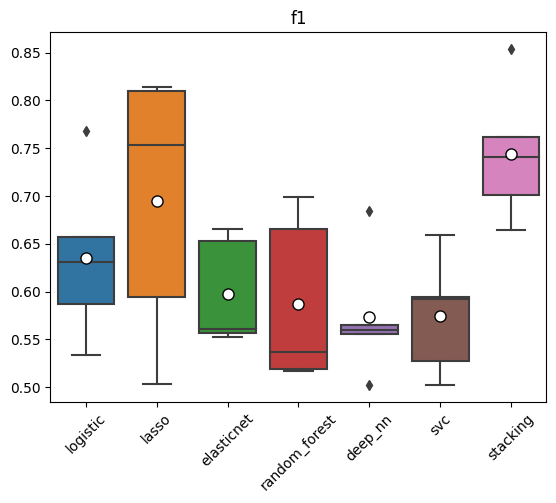

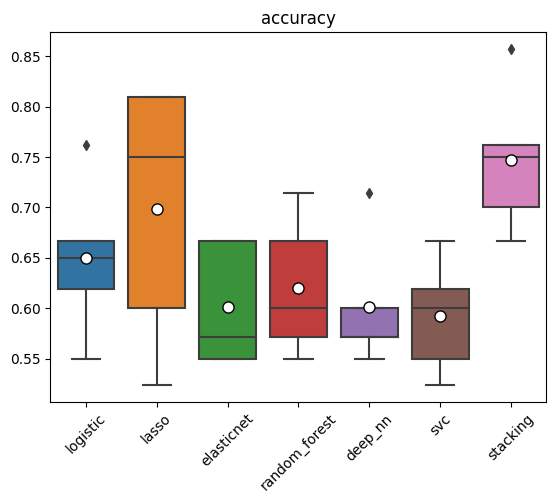

In [191]:
plot_scores(estimator_names, base_scores['cnv'])

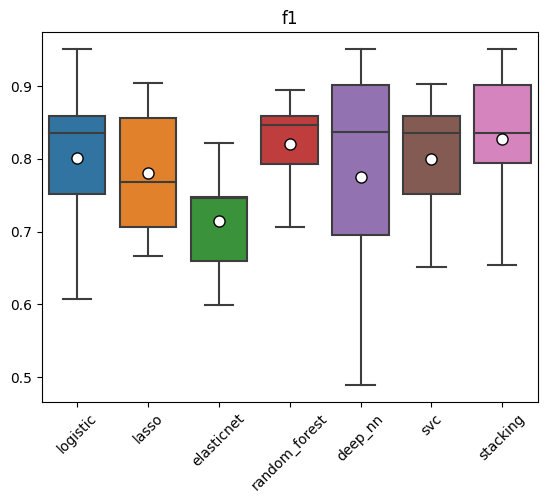

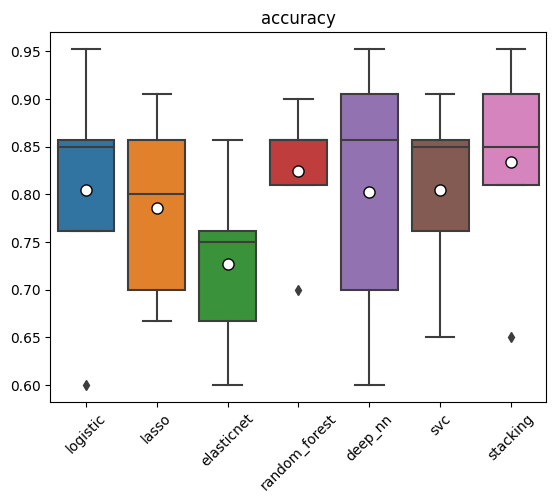

In [192]:
plot_scores(estimator_names, base_scores['mrna'])

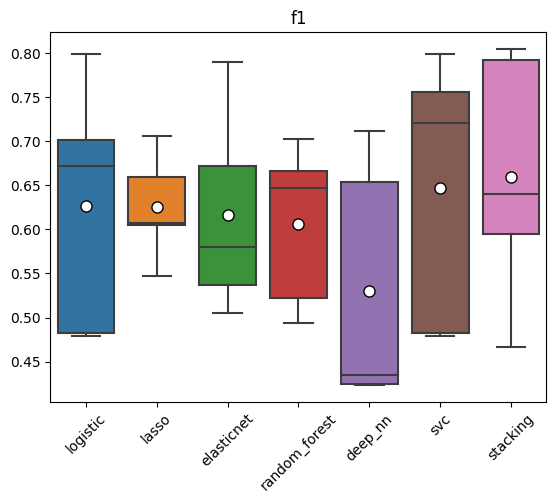

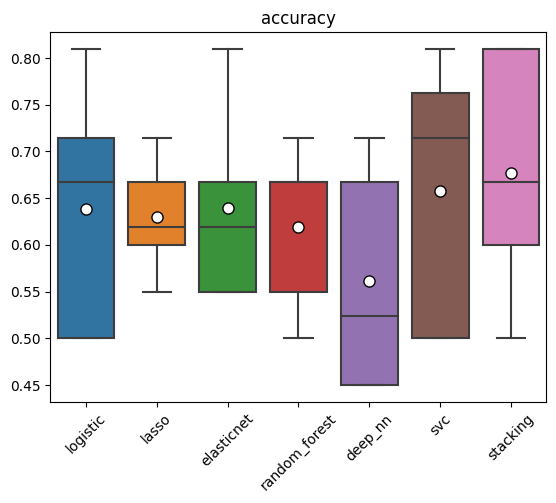

In [193]:
plot_scores(estimator_names, base_scores['prot'])

In [171]:
y_preds = classifiers['prot'].cross_val_predict(X['prot'], y['prot'], method='predict', cv=5)

/Users/signehoel/comp401/sklearn-venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/signehoel/comp401/sklearn-venv/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/signehoel/comp401/sklearn-venv/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Users/signehoel/comp401/sklearn-venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1141: D

In [187]:
print(y['prot'].loc[y['prot']['PAM50_prot'] == 0].shape[0], y['prot'].loc[y['prot']['PAM50_prot'] == 1].shape[0], y['prot'].loc[y['prot']['PAM50_prot'] == 2].shape[0], y['prot'].loc[y['prot']['PAM50_prot'] == 3].shape[0])


24 18 29 32


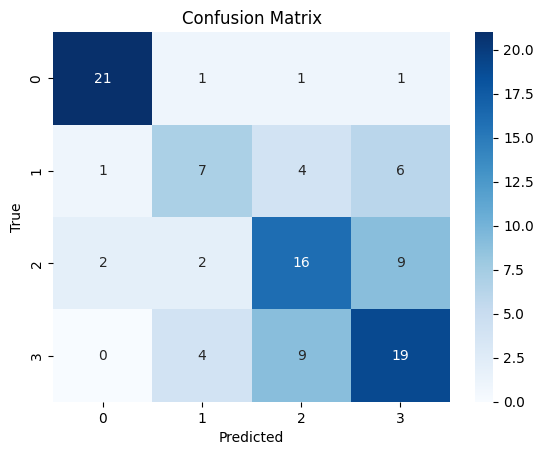

In [174]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y['prot'], y_preds)
# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Add labels, title, and axis ticks
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Meta-Ensemble

In [58]:
class Debugger(BaseEstimator, TransformerMixin):
    def transform(self, data):
        # Here you just print what you need + return the actual data. You're not transforming anything.

        print("Shape of Data:", data.shape)
        #print(pd.DataFrame(data).head())
        return data

    def fit(self, data, y=None, **fit_params):
        # No need to fit anything, because this is not an actual  transformation.

        return self

In [29]:
from mlxtend.feature_selection import ColumnSelector

class MultiOmicsIntegrationClassifier(BaseEstimator, TransformerMixin):
    def __init__(self, estimator_list=None, feature_select=None, l1_final_estimator=LogisticRegression(random_state=0, n_jobs=-1), l2_final_estimator=LogisticRegression(random_state=0, n_jobs=-1), l1_stack_method='auto', l2_stack_method='auto', cv=5, n_jobs=-1):
        # calculating scores
        self.estimator_list = estimator_list
        self.feature_select = feature_select
        self.l1_final_estimator = l1_final_estimator
        self.l2_final_estimator = l2_final_estimator
        self.l1_stack_method = l1_stack_method
        self.l2_stack_method = l2_stack_method
        self.cv = cv
        self.n_jobs = n_jobs
        
    def _get_pipeline(self):
        self.classifiers_ = []
        self.cv_ = StratifiedKFold(n_splits=self.cv, random_state=0, shuffle=True)
        self.l1_final_estimator_ = Pipeline([('imputer', SimpleImputer(strategy='median')), ('l1', self.l1_final_estimator)])
        
        for dataset, columns in self.column_names_.items():
            stacking = Pipeline([('column_selector', ColumnSelector(cols=columns)), ('stacking', StackingClassifier(estimators=self.estimator_list[dataset], final_estimator=self.l1_final_estimator_, cv=self.cv_, stack_method=self.l1_stack_method, n_jobs=self.n_jobs))])
            self.classifiers_.append((dataset, stacking))
        
        self.l2_final_estimator_ = Pipeline([('imputer', SimpleImputer(strategy='median')), ('l2', self.l2_final_estimator)])
        stacking = StackingClassifier(estimators=self.classifiers_, final_estimator=self.l2_final_estimator_, cv=self.cv_, stack_method=self.l2_stack_method, n_jobs=self.n_jobs)
        
        return stacking
    
    def fit(self, X, y, column_names=None, **fit_params):
        
        self.column_names_ = column_names

        self.pipeline_ = self._get_pipeline()
        self.pipeline_.fit(X, y)

        return self
    
    def predict(self, X):
        return self.pipeline_.predict(X)
    
    def predict_proba(self, X):
        return self.pipeline_.predict_proba(X)

In [40]:
from mlxtend.feature_selection import ColumnSelector

class MultiOmicsIntegrationClassifier(BaseEstimator, TransformerMixin):
    def __init__(self, estimator_dict=None, feature_select=None, final_estimator=LogisticRegression(random_state=0, n_jobs=-1), stack_method='auto', cv=5, n_jobs=-1):
        # calculating scores
        self.estimator_dict = estimator_dict
        self.feature_select = feature_select
        self.final_estimator = final_estimator
        self.stack_method = stack_method
        self.cv = cv
        self.n_jobs = n_jobs
        
    def _get_pipeline(self):
        self.classifiers_ = []
        self.cv_ = StratifiedKFold(n_splits=self.cv, random_state=0, shuffle=True)
        
        for dataset, columns in self.column_names_.items():
            stacking = Pipeline([('column_selector', ColumnSelector(cols=columns)), ('modality_clf', self.estimator_dict[dataset])])
            self.classifiers_.append((dataset, stacking))
        
        self.final_estimator_ = Pipeline([('imputer', SimpleImputer(strategy='median')), ('final_estimator', self.final_estimator)])
        stacking = StackingClassifier(estimators=self.classifiers_, final_estimator=self.final_estimator_, cv=self.cv_, stack_method=self.stack_method, n_jobs=self.n_jobs)
        
        return stacking
    
    def fit(self, X, y, column_names=None, **fit_params):
        
        self.column_names_ = column_names

        self.pipeline_ = self._get_pipeline()
        self.pipeline_.fit(X, y)

        return self
    
    def predict(self, X):
        return self.pipeline_.predict(X)
    
    def predict_proba(self, X):
        return self.pipeline_.predict_proba(X)

In [41]:
estimator_mapping = {
    'cnv': ['logistic', 'lasso', 'random_forest'],
    'mrna': ['logistic', 'lasso', 'random_forest', 'svc'],
    'prot': ['logistic', 'random_forest', 'svc'],
}
estimator_list = {}

for modality in datasets:
    estimator_list[modality] = [(name, estimator) for (name, estimator) in estimators if any(x for x in estimator_mapping[modality] if x == name)]

In [ ]:
estimator_dict = {}

estimator_dict['cnv'] = ModalityPipeline(estimator_list['cnv'], )

In [6]:
estimator_mapping = {
    'cnv': ['logistic', 'lasso', 'random_forest'],
    'mrna': ['logistic', 'lasso', 'random_forest', 'svc'],
    'prot': ['logistic', 'random_forest', 'svc'],
}
estimator_list = {}

for modality in datasets:
    estimator_list[modality] = [(name, estimator) for (name, estimator) in estimators if any(x for x in estimator_mapping[modality] if x == name)]

In [7]:
column_names = {}

for key in X.keys():
    column_names[key] = X[key].columns

In [8]:
meta_ensemble = MultiOmicsIntegrationClassifier(estimator_list, cv=3)

In [81]:
meta_ensemble.fit(merged_X, y, column_names=column_names)

/Users/signehoel/comp401/sklearn-venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/signehoel/comp401/sklearn-venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/signehoel/comp401/sklearn-venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/signehoel/comp401/sklearn-venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/signehoel/comp401/sklearn-venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.w

MultiOmicsIntegrationClassifier(cv=3,
                                estimator_list={'cnv': [('logistic',
                                                         LogisticRegression(multi_class='multinomial',
                                                                            solver='saga')),
                                                        ('lasso',
                                                         LogisticRegression(penalty='l1',
                                                                            solver='liblinear')),
                                                        ('random_forest',
                                                         RandomForestClassifier(random_state=0))],
                                                'mrna': [('logistic',
                                                          LogisticRegression(multi_class='multinomial',
                                                                             solver='saga')),
                                                         ('lasso',
                                                          Logisti...n(penalty='l1',
                                                                             solver='liblinear')),
                                                         ('random_forest',
                                                          RandomForestClassifier(random_state=0)),
                                                         ('svc',
                                                          CalibratedClassifierCV(estimator=LinearSVC(C=10)))],
                                                'prot': [('logistic',
                                                          LogisticRegression(multi_class='multinomial',
                                                                             solver='saga')),
                                                         ('random_forest',
                                                          RandomForestClassifier(random_state=0)),
                                                         ('svc',
                                                          CalibratedClassifierCV(estimator=LinearSVC(C=10)))]})

In [82]:
meta_ensemble.pipeline_

StackingClassifier(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
                   estimators=[('cnv',
                                Pipeline(steps=[('column_selector',
                                                 ColumnSelector(cols=Index(['A1BG_cnv', 'A2M_cnv', 'NAT1_cnv', 'NAT2_cnv', 'SERPINA3_cnv',
       'AADAC_cnv', 'AAMP_cnv', 'AANAT_cnv', 'AARS_cnv', 'ABAT_cnv',
       ...
       'LOC105376430_cnv', 'LOC105376575_cnv', 'LOC105376887_cnv',
       'LOC105376948_cn...
                                                                                 RandomForestClassifier(random_state=0)),
                                                                                ('svc',
                                                                                 CalibratedClassifierCV(estimator=LinearSVC(C=10)))],
                                                                    final_estimator=Pipeline(steps=[('imputer',
                                                                                                     SimpleImputer(strategy='median')),
                                                                                                    ('l1',
                                                                                                     LogisticRegression(n_jobs=-1,
                                                                                                                        random_state=0))]),
                                                                    n_jobs=-1))]))],
                   final_estimator=Pipeline(steps=[('imputer',
                                                    SimpleImputer(strategy='median')),
                                                   ('l2',
                                                    LogisticRegression(n_jobs=-1,
                                                                       random_state=0))]),
                   n_jobs=-1)

In [9]:
integration_scores, integration_metrics = get_cross_metrics(meta_ensemble, merged_X, y, name='Integration Model', cv=5, verbose=2, fit_params={'column_names': column_names})

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] END .................................................... total time= 6.9min
[CV] END .................................................... total time= 7.0min


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  7.0min remaining: 10.5min


[CV] END .................................................... total time= 7.0min
[CV] END .................................................... total time= 7.1min
[CV] END .................................................... total time= 7.1min


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  7.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  7.2min finished


In [10]:
integration_metrics

,f1,accuracy
Integration Model,0.835 +/- 0.088,0.843 +/- 0.086


We see that currently, the Integration Model is performing at a similar accuracy as just mRNA by itself.

In [11]:
names = ['cnv', 'mrna', 'prot', 'integration']

In [25]:
integration = []
integration.append(scores['cnv'])
integration.append(scores['mrna'])
integration.append(scores['prot'])
integration.append(integration_scores)

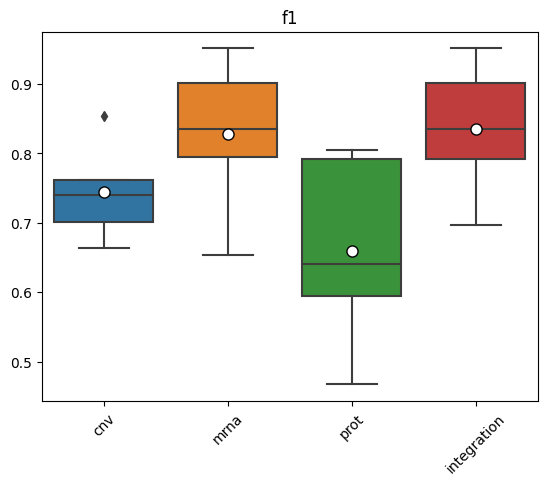

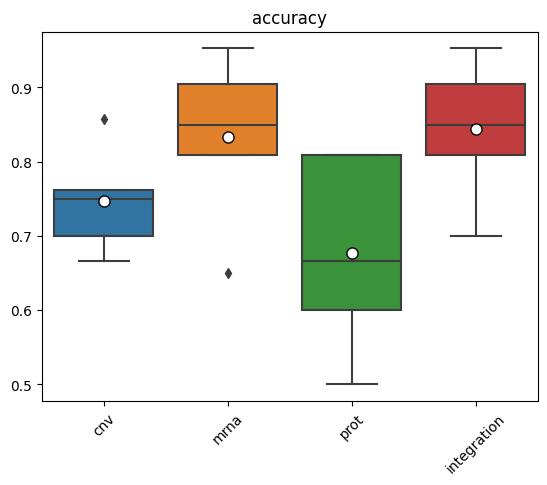

In [28]:
plot_scores(names, integration)